In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.duplicated('CustomerId').sum()

0

In [11]:
# Check for missing values
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

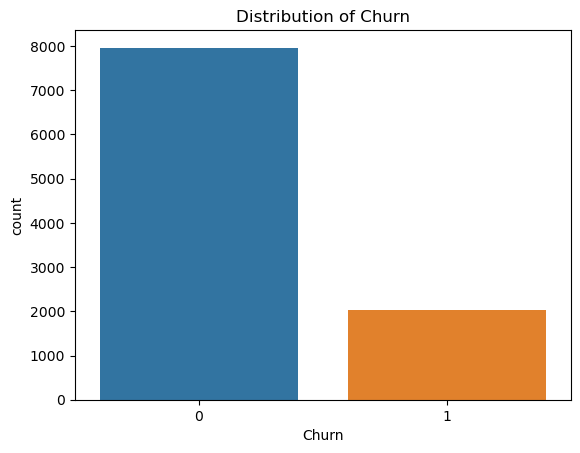

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Churn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

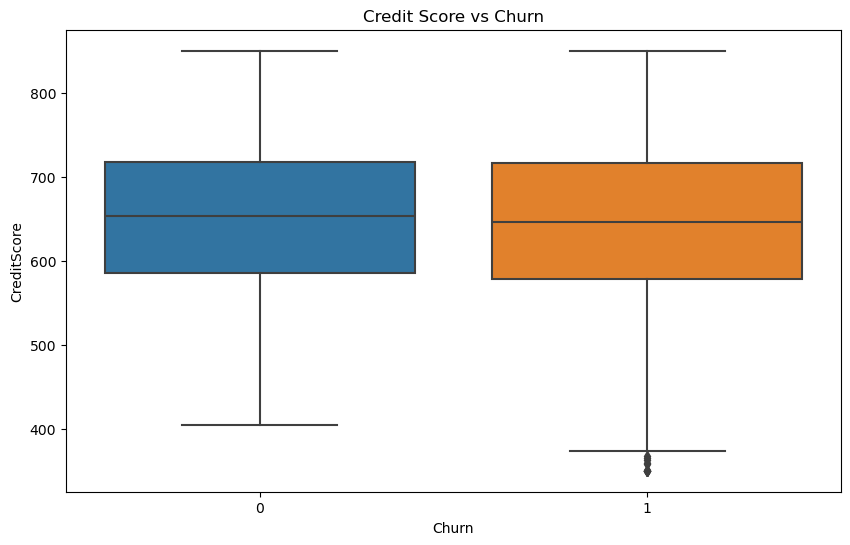

In [13]:
# Plotting Credit Score vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CreditScore', data=df)
plt.title('Credit Score vs Churn')
plt.show()

C:\Users\Abhinav Raja Raizada\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


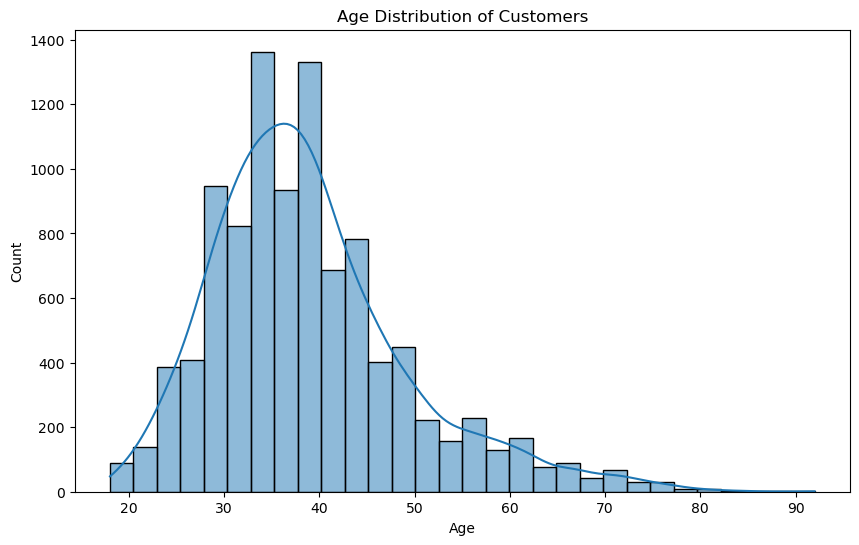

In [16]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

C:\Users\Abhinav Raja Raizada\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


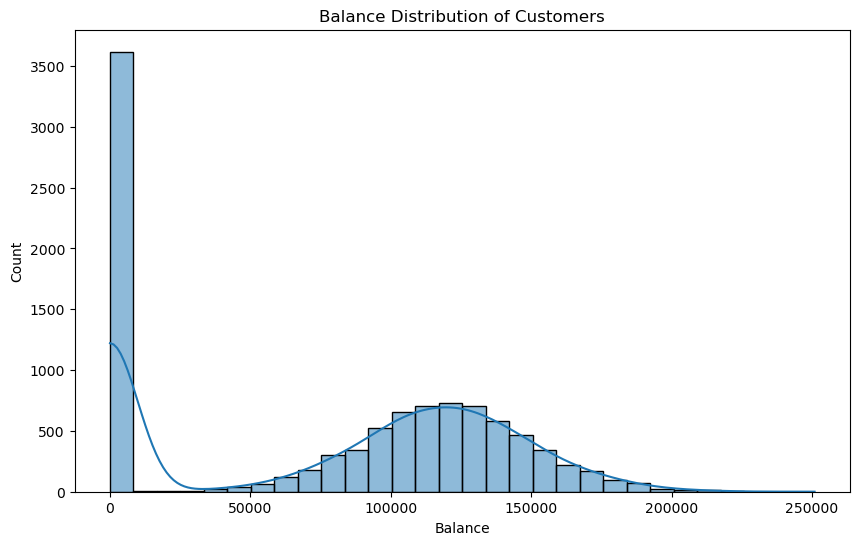

In [20]:
# Balance distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title('Balance Distribution of Customers')
plt.show()

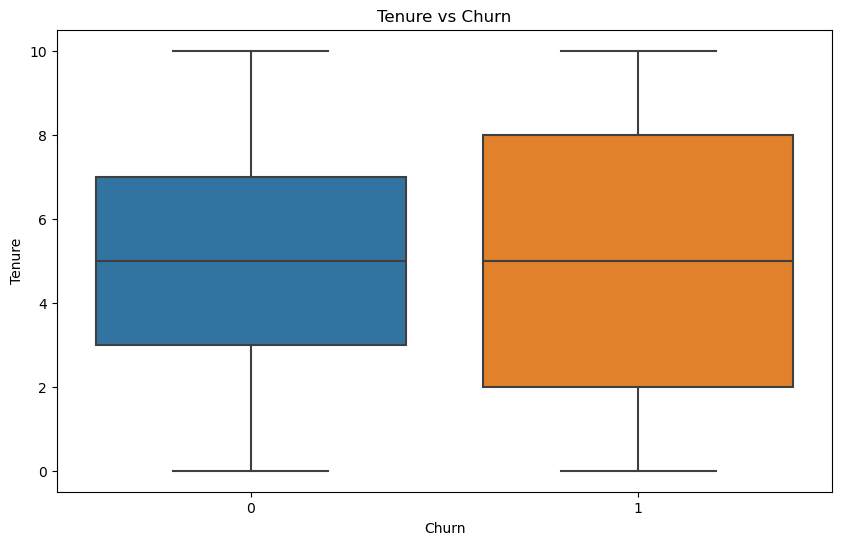

In [22]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

In [24]:
# Define label (target) and features
X = df.drop(columns=['Churn', 'CustomerId', 'Surname'])  # Features
y = df['Churn']  # Label

In [25]:
# Checking the distribution of the target variable (Churn)
y.value_counts(normalize=True)

Churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [26]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Checking the distribution after under sampling
y_res.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [27]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Checking the distribution after over sampling
y_res.value_counts(normalize=True)

Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

In [28]:
# Random Under Sampling Example
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# Display the new class distribution
print(f'Class distribution after Random Under Sampling:\n{y_rus.value_counts()}')

Class distribution after Random Under Sampling:
Churn
0    2037
1    2037
Name: count, dtype: int64


In [29]:
# Random Over Sampling Example
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Display the new class distribution
print(f'Class distribution after Random Over Sampling:\n{y_ros.value_counts()}')

Class distribution after Random Over Sampling:
Churn
1    7963
0    7963
Name: count, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

# Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Display the shapes of the resulting splits
print(f'Original Data: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

Original Data: X_train: (7000, 10), X_test: (3000, 10), y_train: (7000,), y_test: (3000,)


In [31]:
# First, apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# Split under sampled data
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

# Display the shapes of the resulting splits
print(f'Random Under Sampled Data: X_rus_train: {X_rus_train.shape}, X_rus_test: {X_rus_test.shape}, y_rus_train: {y_rus_train.shape}, y_rus_test: {y_rus_test.shape}')

Random Under Sampled Data: X_rus_train: (2851, 10), X_rus_test: (1223, 10), y_rus_train: (2851,), y_rus_test: (1223,)


In [32]:
# First, apply Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Split over sampled data
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=25)

# Display the shapes of the resulting splits
print(f'Random Over Sampled Data: X_ros_train: {X_ros_train.shape}, X_ros_test: {X_ros_test.shape}, y_ros_train: {y_ros_train.shape}, y_ros_test: {y_ros_test.shape}')

Random Over Sampled Data: X_ros_train: (11148, 10), X_ros_test: (4778, 10), y_ros_train: (11148,), y_ros_test: (4778,)


In [34]:
X = pd.get_dummies(X, drop_first=True)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load data
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# Define features and target
X = df.drop(columns=['CustomerId', 'Surname', 'Churn'])
y = df['Churn']

# One-Hot Encode Categorical Features
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split for Original Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

# Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=25)

# Standardize Features for Original Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier with Original Data
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
print('Original Data SVM:')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Standardize Features for Random Under Sampled Data
X_rus_train_scaled = scaler.fit_transform(X_rus_train)
X_rus_test_scaled = scaler.transform(X_rus_test)

# Train SVM Classifier with Random Under Sampled Data
svm_classifier.fit(X_rus_train_scaled, y_rus_train)
y_rus_pred = svm_classifier.predict(X_rus_test_scaled)
print('Random Under Sampled Data SVM:')
print(accuracy_score(y_rus_test, y_rus_pred))
print(classification_report(y_rus_test, y_rus_pred))

# Standardize Features for Random Over Sampled Data
X_ros_train_scaled = scaler.fit_transform(X_ros_train)
X_ros_test_scaled = scaler.transform(X_ros_test)

# Train SVM Classifier with Random Over Sampled Data
svm_classifier.fit(X_ros_train_scaled, y_ros_train)
y_ros_pred = svm_classifier.predict(X_ros_test_scaled)
print('Random Over Sampled Data SVM:')
print(accuracy_score(y_ros_test, y_ros_pred))
print(classification_report(y_ros_test, y_ros_pred))

Original Data SVM:
0.863
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2419
           1       0.79      0.40      0.53       581

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000

Random Under Sampled Data SVM:
0.7669664758789861
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       603
           1       0.78      0.75      0.76       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223

Random Over Sampled Data SVM:
0.7900795311845961
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2426
           1       0.79      0.78      0.78      2352

    accuracy                           0.79      4778
   m

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

X = df.drop(columns=['CustomerId', 'Surname', 'Churn'])
y = df['Churn']

In [5]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
print('Original Data SVM:')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Original Data SVM:
0.863
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2419
           1       0.79      0.40      0.53       581

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



In [7]:
X_rus_train_scaled = scaler.fit_transform(X_rus_train)
X_rus_test_scaled = scaler.transform(X_rus_test)

svm_classifier.fit(X_rus_train_scaled, y_rus_train)
y_rus_pred = svm_classifier.predict(X_rus_test_scaled)
print('Random Under Sampled Data SVM:')
print(accuracy_score(y_rus_test, y_rus_pred))
print(classification_report(y_rus_test, y_rus_pred))

X_ros_train_scaled = scaler.fit_transform(X_ros_train)
X_ros_test_scaled = scaler.transform(X_ros_test)

Random Under Sampled Data SVM:
0.7669664758789861
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       603
           1       0.78      0.75      0.76       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



In [9]:
svm_classifier.fit(X_ros_train_scaled, y_ros_train)
y_ros_pred = svm_classifier.predict(X_ros_test_scaled)
print('Random Over Sampled Data SVM:')
print(accuracy_score(y_ros_test, y_ros_pred))
print(classification_report(y_ros_test, y_ros_pred))

Random Over Sampled Data SVM:
0.7900795311845961
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2426
           1       0.79      0.78      0.78      2352

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



In [10]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Pipeline for Random Under Sampling
pipeline_rus = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler(random_state=42)),
    ('classifier', SVC())
])

param_grid_rus = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

grid_rus = GridSearchCV(pipeline_rus, param_grid_rus, cv=5, scoring='accuracy')
grid_rus.fit(X, y)
best_rus_model = grid_rus.best_estimator_
y_rus_pred = best_rus_model.predict(X_test)
print('Random Under Sampling Model Accuracy:')
print(accuracy_score(y_test, y_rus_pred))

Random Under Sampling Model Accuracy:
0.796
